In [1]:
def load_mnist(path, kind):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

Epoch 0 Training Error:  2.2999848107983305  Validation Error:  2.243834035482552
Epoch 100 Training Error:  0.7968439385910822  Validation Error:  0.8006497207304981
Epoch 200 Training Error:  0.6218412302190063  Validation Error:  0.6571831762598509
Epoch 300 Training Error:  0.5538305593615432  Validation Error:  0.6103362579230505
Epoch 400 Training Error:  0.4932070322651861  Validation Error:  0.5121449147938222
Epoch 500 Training Error:  0.4800230145728517  Validation Error:  0.5226170056761559
Epoch 600 Training Error:  0.458692715180345  Validation Error:  0.5016188659863354
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1000
           1       0.98      0.95      0.97      1000
           2       0.75      0.66      0.70      1000
           3       0.82      0.87      0.84      1000
           4       0.73      0.71      0.72      1000
           5       0.97      0.90      0.93      1000
           6       0.57      0

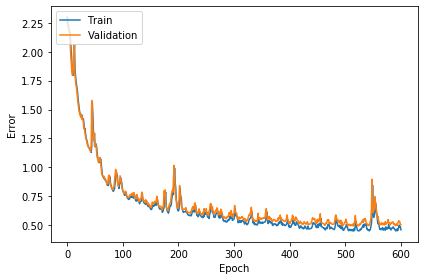

In [21]:
'''Task 1: Implementation of Neural Network with one hidden layer from scratch'''

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt


X_train, y_train = load_mnist('data/fashion', kind='train')

X_train=X_train.T


Y_tr=[]

#one hot encoding..

for i in y_train:
    temp=[0 for j in range(10)]
    temp[i]=1
    Y_tr.append(temp)
    
Y_tr=np.asarray(Y_tr)

Y_tr=Y_tr.T




X_test, y_test = load_mnist('data/fashion', kind='t10k')
X_test=X_test.T

Y_te=[]

for i in y_test:
    temp=[0 for j in range(10)]
    temp[i]=1
    Y_te.append(temp)
    
Y_te=np.asarray(Y_te)

Y_te=Y_te.T


epochs=601
eta=0.5
hidden=64

def graph_plot_training_val(epochl,te,ve):
    
    plt.plot(epochl, te)
    plt.plot(epochl, ve)
    
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.savefig('TE_VE_1hn.png')
    plt.show()


def sigmoid2(z):
        return 1/(1 + np.exp(-z))

def compute_multiclass_loss(Y, Y_cap):

    L_sum = np.sum(np.multiply(Y, np.log(Y_cap)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

def validation(w1,w2,b1,b2):
        
        Z1 = np.matmul(w1, X_test) + b1
        A1 = sigmoid2(Z1)
        Z2 = np.matmul(w2, A1) + b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)


        loss=compute_multiclass_loss(Y_te,A2)
        
        return loss
        
def testing(w1,w2,b1,b2):
        
        Z1 = np.matmul(w1, X_test) + b1
        A1 = sigmoid2(Z1)
        Z2 = np.matmul(w2, A1) + b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

        predictions = np.argmax(A2, axis=0)
        
        
        print(classification_report(y_test,predictions))
        
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, 
                                                          average='weighted')
        
        return (precision,recall,f1)

def training(epochs,eta,hidden):
    
    w1=np.random.randn(hidden,X_train.shape[0])*0.01
    w2=np.random.randn(10,(hidden))*0.01
    
    b1 = np.zeros(shape=(hidden, 1))
    b2 = np.zeros(shape=(10, 1))
    
    te=[]
    ve=[]
    el=[]

    for i in range(epochs):
        
        z1=np.matmul(w1,X_train)+b1
        a1=sigmoid2(z1)
        
        z2=np.matmul(w2,a1)+b2
        a2=np.exp(z2) / np.sum(np.exp(z2), axis=0)
        
        cost = compute_multiclass_loss(Y_tr,a2)
        
        dz2=a2-Y_tr
        dw2=(np.matmul(dz2,a1.T))/60000
        db2=(1 / 60000) * np.sum(dz2, axis=1, keepdims=True)
        
        
        part1=np.matmul(w2.T,dz2)
        dz1=part1*sigmoid2(z1) * (1 - sigmoid2(z1))
        
        dw1=(np.matmul(dz1,X_train.T))/60000
        db1=(1 / 60000) * np.sum(dz1, axis=1, keepdims=True)
        
        w1=w1-eta*(dw1)
        w2=w2-eta*(dw2)
        b1=b1-eta*(db1)
        b2=b2-eta*(db2)
        
        te.append(cost)
        cost_ve=validation(w1,w2,b1,b2)
        ve.append(cost_ve)
        el.append(i)
        
        if (i % 100 == 0):
            print("Epoch", i, "Training Error: ", cost," Validation Error: ",cost_ve)
            
    
    
    (p,r,f1)=testing(w1,w2,b1,b2)
    
    return (el,te,ve,p,r,f1)

    

elist,telist,velist,prec,rec,f1=training(epochs,eta,hidden) 
graph_plot_training_val(elist,telist,velist)


Running for hidden nodes:  16
Epoch 0 Training Error:  2.3035180761208123  Validation Error:  2.2714815244835096
Epoch 100 Training Error:  1.811432112034202  Validation Error:  1.807098776974549
Epoch 200 Training Error:  1.7169970788288957  Validation Error:  1.7198867351389302
Epoch 300 Training Error:  1.6198676675275365  Validation Error:  1.5985637550925706
Epoch 400 Training Error:  1.3456020140744573  Validation Error:  1.3438848216407588
Epoch 500 Training Error:  1.2163767598724347  Validation Error:  1.2811171405778754
              precision    recall  f1-score   support

           0       0.24      0.92      0.38      1000
           1       0.52      0.95      0.68      1000
           2       0.37      0.10      0.16      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.99      0.37      0.54      1000
           6       0.00      0.00      0.00      1000
           7       0.60      0.

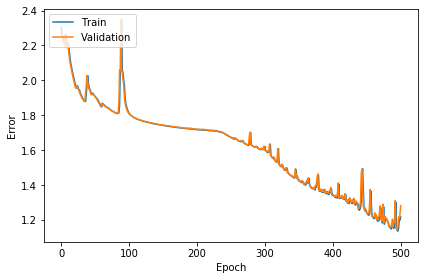

Running for hidden nodes:  32
Epoch 0 Training Error:  2.3097165798250536  Validation Error:  2.283516945351477
Epoch 100 Training Error:  1.2015387772024866  Validation Error:  1.2874691475757525
Epoch 200 Training Error:  0.8477085406163801  Validation Error:  0.8451307986087655
Epoch 300 Training Error:  0.7698537761040258  Validation Error:  0.7982297429307443
Epoch 400 Training Error:  0.6802342733468757  Validation Error:  0.7175755064524024
Epoch 500 Training Error:  0.7030611359499714  Validation Error:  0.7048967082759516
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1000
           1       0.87      0.95      0.91      1000
           2       0.67      0.28      0.39      1000
           3       0.78      0.81      0.79      1000
           4       0.44      0.93      0.59      1000
           5       0.97      0.79      0.87      1000
           6       0.37      0.10      0.16      1000
           7       0.86      0

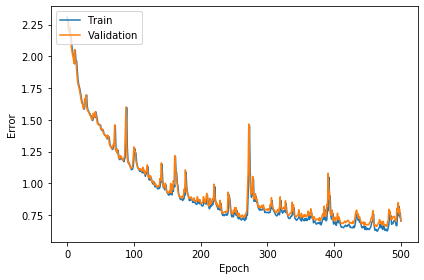

Running for hidden nodes:  64
Epoch 0 Training Error:  2.306423734180366  Validation Error:  2.2461916404027362
Epoch 100 Training Error:  0.8041831621831357  Validation Error:  0.792517624993037
Epoch 200 Training Error:  0.681710381564096  Validation Error:  0.6909031939921217
Epoch 300 Training Error:  0.5188808885844444  Validation Error:  0.5540763253802967
Epoch 400 Training Error:  0.4993819052871489  Validation Error:  0.5271318116482194
Epoch 500 Training Error:  0.5039084737076319  Validation Error:  0.5594902242710417
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1000
           1       0.97      0.95      0.96      1000
           2       0.63      0.82      0.71      1000
           3       0.73      0.88      0.80      1000
           4       0.61      0.74      0.67      1000
           5       0.98      0.83      0.90      1000
           6       0.76      0.23      0.35      1000
           7       0.83      0.9

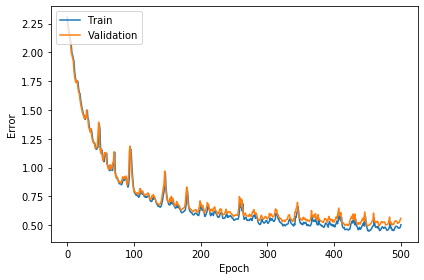

Running for hidden nodes:  128
Epoch 0 Training Error:  2.2937140386132264  Validation Error:  2.1714885206950014
Epoch 100 Training Error:  0.7303814276209046  Validation Error:  0.7538463457720407
Epoch 200 Training Error:  0.561192865544894  Validation Error:  0.6285324781006312
Epoch 300 Training Error:  0.4931804250410953  Validation Error:  0.5262360055844891
Epoch 400 Training Error:  0.46335011915550944  Validation Error:  0.5375172943325403
Epoch 500 Training Error:  0.4150945805867918  Validation Error:  0.4584605454575121
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1000
           1       0.98      0.95      0.96      1000
           2       0.73      0.71      0.72      1000
           3       0.83      0.88      0.85      1000
           4       0.69      0.78      0.73      1000
           5       0.94      0.93      0.94      1000
           6       0.66      0.42      0.52      1000
           7       0.90     

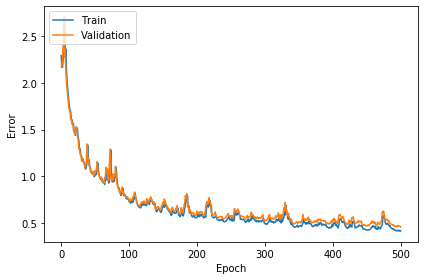

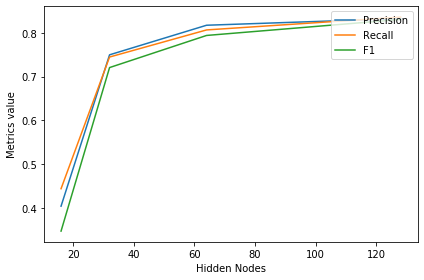

In [13]:
'''For one hidden layer varying hidden nodes'''

import matplotlib.pyplot as plt
    
def graph_plot_hnvary(hl,pl,rl,fl):
    plt.plot(hl,pl)
    plt.plot(hl,rl)
    plt.plot(hl,fl)
    
    plt.xlabel('Hidden Nodes')
    plt.ylabel('Metrics value')
    
    plt.legend(['Precision', 'Recall','F1'], loc='upper right')
    plt.tight_layout()
    plt.savefig('PRF__HN_1HL.png')
    plt.show()
    
    

hnl=[16,32,64,128]

pl=[]
rl=[]
fl=[]

for hn in hnl:
    print("Running for hidden nodes: ",hn)
    elist,telist,velist,prec,rec,f=training(501,0.5,hn)
    graph_plot_training_val(elist,telist,velist)
    pl.append(prec)
    rl.append(rec)
    fl.append(f)
    
graph_plot_hnvary(hnl,pl,rl,fl)


Running for epoch:  100
Epoch 0 Training Error:  2.3059897322851257  Validation Error:  2.2608541098610373
              precision    recall  f1-score   support

           0       0.58      0.85      0.69      1000
           1       0.62      0.90      0.73      1000
           2       0.37      0.91      0.53      1000
           3       0.80      0.00      0.01      1000
           4       0.44      0.02      0.03      1000
           5       0.75      0.89      0.81      1000
           6       0.19      0.09      0.12      1000
           7       0.93      0.71      0.81      1000
           8       0.85      0.96      0.90      1000
           9       0.87      0.91      0.89      1000

    accuracy                           0.62     10000
   macro avg       0.64      0.62      0.55     10000
weighted avg       0.64      0.62      0.55     10000



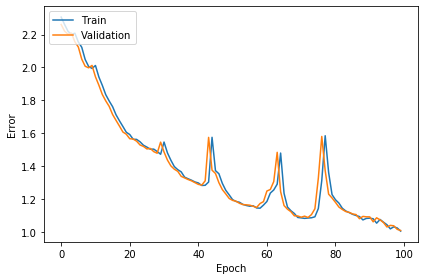

Running for epoch:  300
Epoch 0 Training Error:  2.2978382181758286  Validation Error:  2.248248232083258
Epoch 100 Training Error:  0.8913874386482193  Validation Error:  0.9140345223455905
Epoch 200 Training Error:  0.6674471960074965  Validation Error:  0.701065647741543
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1000
           1       0.97      0.94      0.96      1000
           2       0.48      0.69      0.56      1000
           3       0.89      0.76      0.82      1000
           4       0.66      0.15      0.25      1000
           5       0.89      0.92      0.90      1000
           6       0.43      0.54      0.48      1000
           7       0.95      0.79      0.86      1000
           8       0.92      0.96      0.94      1000
           9       0.84      0.95      0.89      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.74     10000
weighted avg       0.

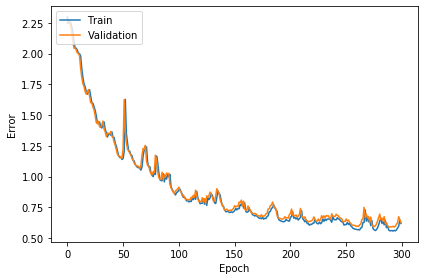

Running for epoch:  600
Epoch 0 Training Error:  2.2989102161500443  Validation Error:  2.248603203184772
Epoch 100 Training Error:  0.9824993650471234  Validation Error:  0.972815506421409
Epoch 200 Training Error:  0.6875883975154058  Validation Error:  0.708089478607823
Epoch 300 Training Error:  0.5719767322043525  Validation Error:  0.6008278958779554
Epoch 400 Training Error:  0.5433442668536853  Validation Error:  0.6626614021809036
Epoch 500 Training Error:  0.5010594826171569  Validation Error:  0.5357127234525482
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1000
           1       0.98      0.94      0.96      1000
           2       0.73      0.70      0.72      1000
           3       0.83      0.80      0.81      1000
           4       0.62      0.86      0.72      1000
           5       0.93      0.91      0.92      1000
           6       0.67      0.39      0.50      1000
           7       0.91      0.92     

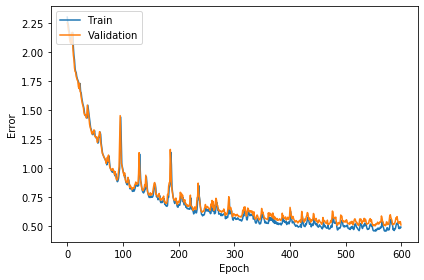

Running for epoch:  1000
Epoch 0 Training Error:  2.297303656287996  Validation Error:  2.2543182145830323
Epoch 100 Training Error:  1.0198307460397047  Validation Error:  0.9647757847061985
Epoch 200 Training Error:  0.6407324127594521  Validation Error:  0.6660156163661448
Epoch 300 Training Error:  0.5688849934119544  Validation Error:  0.5878133399755002
Epoch 400 Training Error:  0.5331817800202587  Validation Error:  0.5911929849929227
Epoch 500 Training Error:  0.4981986835972293  Validation Error:  0.5520801301735394
Epoch 600 Training Error:  0.4991567819497164  Validation Error:  0.55833824281005
Epoch 700 Training Error:  0.4621776034582927  Validation Error:  0.5054755098858935
Epoch 800 Training Error:  0.44519594826824943  Validation Error:  0.4927646857297984
Epoch 900 Training Error:  0.42461175751179125  Validation Error:  0.478804335628967
              precision    recall  f1-score   support

           0       0.77      0.87      0.81      1000
           1       0

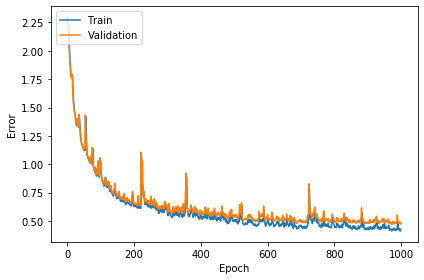

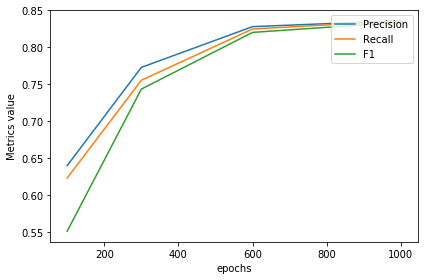

In [20]:
'''For one hidden layer varying epochs'''

import matplotlib.pyplot as plt

def graph_plot_epochvary(el,pl,rl,fl):
    plt.plot(el,pl)
    plt.plot(el,rl)
    plt.plot(el,fl)
    
    plt.xlabel('epochs')
    plt.ylabel('Metrics value')
    
    plt.legend(['Precision', 'Recall','F1'], loc='upper right')
    plt.tight_layout()
    plt.savefig('PRF_epoch_1HL.png')
    plt.show()

epoch_list=[100,300,600,1000]
pl=[]
rl=[]
fl=[]

for epoch in epoch_list:
    print("Running for epoch: ",epoch)
    elist,telist,velist,prec,rec,f=training(epoch,0.5,50)
    graph_plot_training_val(elist,telist,velist)
    pl.append(prec)
    rl.append(rec)
    fl.append(f)
    
graph_plot_epochvary(epoch_list,pl,rl,fl)

In [15]:
import matplotlib.pyplot as plt

def graph_plot_keras1(history):
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 42us/step - loss: 4.6037 - accuracy: 0.6782 - val_loss: 0.8187 - val_accuracy: 0.7283
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.7565 - accuracy: 0.7634 - val_loss: 0.7758 - val_accuracy: 0.

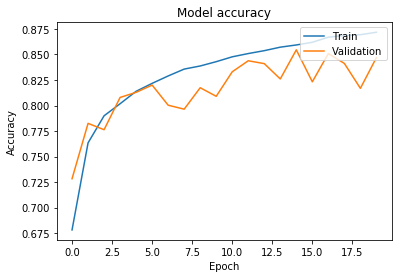

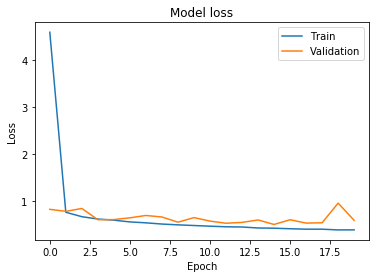

In [10]:
'''Task 2: Multilayer Neural Network using keras using 2 hidden layers'''

x_train, y_train = load_mnist('data/fashion', kind='train')
x_test, y_test = load_mnist('data/fashion', kind='t10k')


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20
hn=128


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



def multilayer2(batch_size,num_classes,epochs,hn):

    model = Sequential()
    model.add(Dense(hn, activation='relu', input_shape=(784,)))
    model.add(Dense(hn, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return (history,score[1])
    
history,result=multilayer2(batch_size,num_classes,epochs,hn)
graph_plot_keras1(history)

60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 3.2172 - accuracy: 0.6896 - val_loss: 0.7323 - val_accuracy: 0.7736
Epoch 2/20

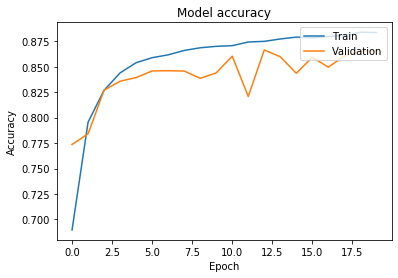

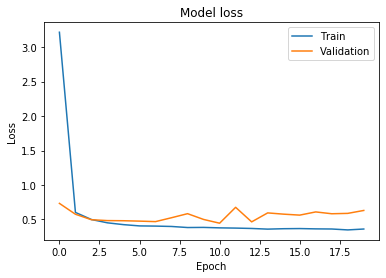

In [16]:
'''Task 2: Multilayer Neural Network using keras using 3 hidden layers'''

x_train, y_train = load_mnist('data/fashion', kind='train')
x_test, y_test = load_mnist('data/fashion', kind='t10k')


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20
hn=128


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



def multilayer3(batch_size,num_classes,epochs,hn):

    model = Sequential()
    model.add(Dense(hn, activation='relu', input_shape=(784,)))
    model.add(Dense(hn, activation='relu'))
    model.add(Dense(hn, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return (history,score[1])
    
history,result=multilayer3(batch_size,num_classes,epochs,hn)
graph_plot_keras1(history)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s 40us/step - loss: 4.6572 - accuracy: 0.6814 - val_loss: 0.8587 - val_accuracy: 0.7214
Test loss: 0.858692098736763
Test accuracy: 0.7214000225067139
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 32us/step - loss: 4.8511 - accuracy: 0.6807 - val_loss: 0.8520 - val_accuracy: 0.7243
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.7250 - accuracy: 0.7701 - val_loss: 0.6579 - val_accuracy: 0.7853
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.6413 - accuracy: 0.7958 - val_loss: 0.6448 - val_accuracy: 0.8034
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.5722 - accuracy: 0.8124 - val_loss: 0.6747 - val_accuracy: 0.7944
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.5494 - accuracy: 0.8215 - val_loss: 0.6013 - val_accuracy: 0.8169
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.5113 - accuracy: 0.8276 - val_loss: 0.9531 - val_accuracy: 0.8020
Epoch 7/20
60000/60000 [==============================] - 2s 29us/st

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 5.0353 - accuracy: 0.6900 - val_loss: 1.0406 - val_accuracy: 0.6957
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.8008 - accuracy: 0.7711 - val_loss: 0.7959 - val_accuracy: 0.7651
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.6638 - accuracy: 0.7997 - val_loss: 0.9658 - val_accuracy: 0.7408
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.5882 - accuracy: 0.8188 - val_loss: 0.6373 - val_accuracy: 0.8057
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.5556 - accuracy: 0.8245 - val_loss: 0.5880 - val_accuracy: 0.8227
Epoch 6/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.5141 - accuracy: 0.8349 - val_loss: 0.5966 - val_accuracy: 0.7892
Epoch 7/10
60000/60000 [==============================] - 2s 36us/st

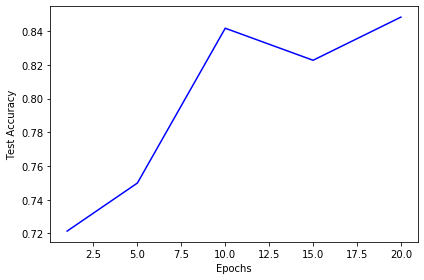

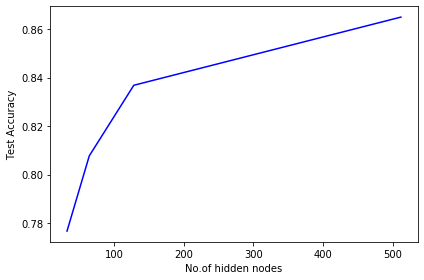

In [12]:
'''Varying hyperparameters like epochs and hidden nodes for Multi-layer NN'''

def graph_plot_epoch(epochsl,accl):
    
    plt.plot(epochl, accl, color='blue')
    plt.xlabel('Epochs',fontsize=10)
    plt.ylabel('Test Accuracy',fontsize=10)

    plt.tight_layout()
    plt.savefig('Accuracy_ML_epoch.png')
    plt.show()
    
def graph_plot_hn(hnl,accl):
    
    plt.plot(hnl, accl, color='blue')
    plt.xlabel('No.of hidden nodes',fontsize=10)
    plt.ylabel('Test Accuracy',fontsize=10)

    plt.tight_layout()
    plt.savefig('Accuracy_ML_hn.png')
    plt.show()    

epochl=[1,5,10,15,20]
hnl=[32,64,128,512]

e_accl=[]
h_accl=[]
for epoch in epochl:
                h,result=multilayer2(128,10,epoch,128)
                e_accl.append(result)
                
for hn in hnl:
                h,result=multilayer2(128,10,10,hn)
                h_accl.append(result)
  
graph_plot_epoch(epochl,e_accl)
graph_plot_hn(hnl,h_accl)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.5130 - accuracy: 0.8165 - val_loss: 0.4082 - val_accuracy: 0.8511
Epoch 2/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.3009 - accuracy: 0.8908 - val_loss: 0.2982 - val_accuracy: 0.8892
Epoch 3/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2474 - accuracy: 0.9097 - val_loss: 0.2604 - val_accuracy: 0.9048
Epoch 4/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2110 - accuracy: 0.9224 - val_loss: 0.3054 - val_accuracy: 0.8927
Epoch 5/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1836 - accuracy: 0.9337 - val_loss: 0.2394 - val_accuracy: 0.9155
Epoch 6/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1560 - accuracy: 0.9428 - val_loss: 0.2356 - val_accurac

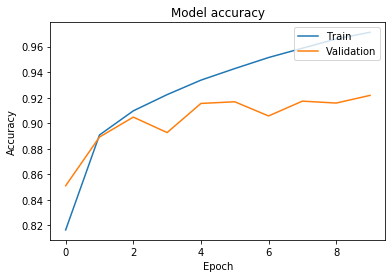

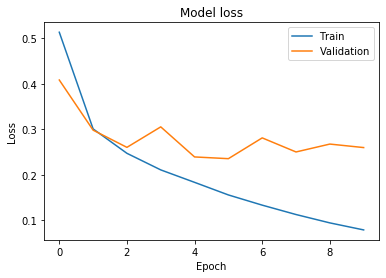

In [14]:
'''Task 3: Convolution Neural Network using keras for 2 convolution layer, 1 max pooling and 1 hidden layer'''

x_train, y_train = load_mnist('data/fashion', kind='train')
x_test, y_test = load_mnist('data/fashion', kind='t10k')


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


batch_size = 128
num_classes = 10
epochs = 12

#reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


def cnn2(batch_size,num_classes,epoch,hn1,hn2):
    
    model = Sequential()
    model.add(Conv2D(hn1, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(Conv2D(hn2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return (history,score[1])

(history,result)=cnn2(batch_size,num_classes,10,32,64)
graph_plot_keras1(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 110s 2ms/step - loss: 0.4965 - accuracy: 0.8203 - val_loss: 0.3686 - val_accuracy: 0.8675
Test loss: 0.36857173628807066
Test accuracy: 0.8675000071525574
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 100s 2ms/step - loss: 0.4983 - accuracy: 0.8210 - val_loss: 0.3551 - val_accuracy: 0.8718
Epoch 2/2
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2936 - accuracy: 0.8926 - val_loss: 0.2874 - val_accuracy: 0.8944
Test loss: 0.2874136620759964
Test accuracy: 0.8944000005722046
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 111s 2ms/step - loss: 0.4881 - accuracy: 0.8245 - val_loss: 0.3341 - val_accuracy: 0.8797
Epoch 2/3
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2898 - accuracy: 0.8941 - val_loss: 0.3114 - val_acc

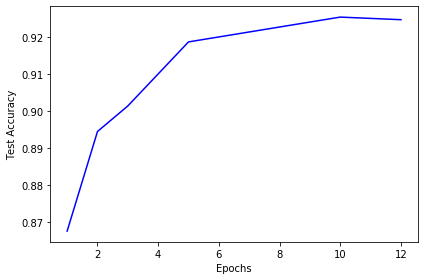

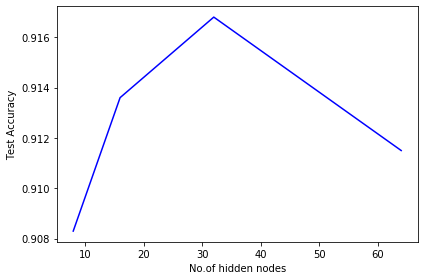

In [15]:
'''Varying hyperparameters like epochs and hidden nodes for CNN'''

def graph_plot_epoch_cnn(epochsl,accl):
    
    plt.plot(epochl, accl, color='blue')
    plt.xlabel('Epochs',fontsize=10)
    plt.ylabel('Test Accuracy',fontsize=10)
    plt.tight_layout()
    plt.savefig('Accuracy_CNN_epoch.png')
    plt.show()
    
def graph_plot_hn_cnn(hnl,accl):
    
    plt.plot(hnl, accl, color='blue')
    plt.xlabel('No.of hidden nodes',fontsize=10)
    plt.ylabel('Test Accuracy',fontsize=10)
    plt.tight_layout()
    plt.savefig('Accuracy_CNN_hn.png')
    plt.show()    

epochl=[1,2,3,5,10,12]
hnl=[8,16,32,64]

e_accl=[]
h_accl=[]
for epoch in epochl:
                h,result=cnn2(128,10,epoch,32,64)
                e_accl.append(result)
                
for hn in hnl:
                h,result=cnn2(128,10,5,hn,(hn*2))
                h_accl.append(result)
  
graph_plot_epoch_cnn(epochl,e_accl)
graph_plot_hn_cnn(hnl,h_accl)